Enhanced correlation matrix with new features:
 tempmax                    1.000000
tempmin                    0.957164
temp                       0.987500
feelslikemax               0.994230
feelslikemin               0.957476
feelslike                  0.985032
dew                        0.898231
humidity                   0.114140
precip                    -0.061675
precipprob                 0.067969
precipcover               -0.123289
snow                      -0.215264
snowdepth                 -0.219476
windgust                   0.152442
windspeed                 -0.256669
winddir                    0.024451
sealevelpressure          -0.238884
cloudcover                -0.218711
visibility                 0.122454
solarradiation             0.577832
solarenergy                0.578246
uvindex                    0.541957
severerisk                 0.456469
moonphase                 -0.007832
tempmax_lag1               0.912571
tempmax_lag3               0.830590
humidity_lag1   

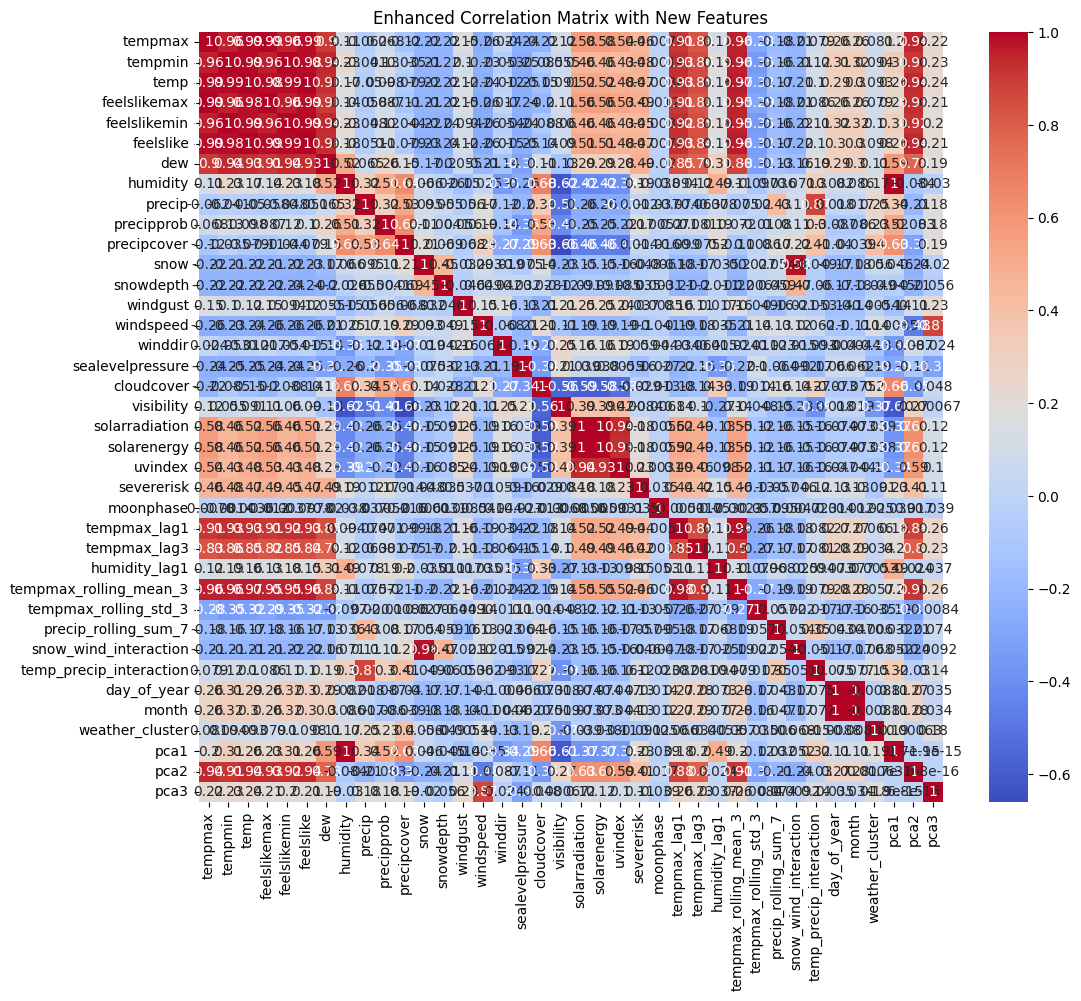

Enhanced dataset saved to C:\Users\June Nguyen\AI_asm2\preprocessing\enhanced_data.csv


In [2]:
# Feature Engineering and Pattern Analysis Notebook
# Filename: feature_engineering.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Dataset
file_path = r"C:\Users\June Nguyen\AI_asm2\data\NewYork.csv"
data = pd.read_csv(file_path)

# 1. Lag Features
data['tempmax_lag1'] = data['tempmax'].shift(1)
data['tempmax_lag3'] = data['tempmax'].shift(3)
data['humidity_lag1'] = data['humidity'].shift(1)

# 2. Rolling Statistics
data['tempmax_rolling_mean_3'] = data['tempmax'].rolling(window=3).mean()
data['tempmax_rolling_std_3'] = data['tempmax'].rolling(window=3).std()
data['precip_rolling_sum_7'] = data['precip'].rolling(window=7).sum()

# 3. Interaction Terms
data['snow_wind_interaction'] = data['snow'] * data['windspeed']
data['temp_precip_interaction'] = data['temp'] * data['precip']

# 4. Seasonal and Temporal Features
data['day_of_year'] = pd.to_datetime(data['datetime']).dt.dayofyear
data['month'] = pd.to_datetime(data['datetime']).dt.month

# 5. Clustering Weather Patterns
kmeans = KMeans(n_clusters=5, random_state=42)
data['weather_cluster'] = kmeans.fit_predict(data[['temp', 'humidity', 'windspeed', 'precip']])

# 6. Dimensionality Reduction (PCA)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data[['temp', 'humidity', 'windspeed', 'precip']])
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]
data['pca3'] = principal_components[:, 2]

# 7. Correlation Analysis with Enhanced Features

# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

print("Enhanced correlation matrix with new features:\n", correlation_matrix['tempmax'])

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Enhanced Correlation Matrix with New Features')
plt.show()

# 8. Save the Enhanced Dataset
enhanced_data_path = r"C:\Users\June Nguyen\AI_asm2\preprocessing\enhanced_data.csv"
data.to_csv(enhanced_data_path, index=False)

print(f"Enhanced dataset saved to {enhanced_data_path}")
